In [1]:
# Import Modules
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

In [2]:
#Read in the CSV
nat_disasters_df = pd.read_csv("../clean.csv")
nat_disasters_df.head()

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,StateParcelId,ParcelSize,ValueofHome,YearBuilt,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
0,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,C15-000-035-4368-3,10890.0,360350.0,2001.0,...,NaN,1.67,19.32,28.46383,-80.79177,120.0,True,B,X:100,NaN
1,120112bfc77a87376,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,C16-000-107-5040-4,2328.0,228680.0,2003.0,...,645.0,2.37,5.11,25.98582,-80.23586,140.0,True,HVHZ,X:100,NaN
2,12081776a04b281f4,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,C51-000-535-8660-8,44.0,135000.0,1980.0,...,NaN,0.96,1.93,27.41706,-82.56742,130.0,True,C,A:100,NaN
3,12103fabafeea9fb7,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,C62-000-778-7949-2,NaN,87660.0,1959.0,...,855.0,1.08,1.00,27.77333,-82.64000,123.0,True,C,"X500:40, A:30, X:30",NaN
4,120213b0f5f17e3d1,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,C21-000-189-4508-9,NaN,663090.0,1991.0,...,50.0,1.37,11.43,26.27444,-81.63916,131.0,True,C,A:100,NaN


In [3]:
#Defining the Dataframe and Header Selection 
new_df = nat_disasters_df[
            ['OwnerCity', 'OwnerState','ValueofHome', 'DistancetoSinkhole','LocationWindSpeed', 
             'WindborneDebrisRegion','Terrain']
]
new_df.head()

,OwnerCity,OwnerState,ValueofHome,DistancetoSinkhole,LocationWindSpeed,WindborneDebrisRegion,Terrain
0,PINEHURST,NC,360350.0,19.32,120.0,True,B
1,STAFFORD,VA,228680.0,5.11,140.0,True,HVHZ
2,RICHMOND,VA,135000.0,1.93,130.0,True,C
3,ARLINGTON,VA,87660.0,1.00,123.0,True,C
4,ROCK HILL,SC,663090.0,11.43,131.0,True,C


In [4]:
# Defining the new dataframe based Owner State and Sinkhole
sinkhole_df = nat_disasters_df[
            ['OwnerState','DistancetoSinkhole']
]
sinkhole_df.describe()

,DistancetoSinkhole
count,227.000000
mean,9.506432
std,9.771763
min,0.110000
25%,1.840000
50%,5.920000
75%,14.635000
max,56.120000


In [5]:
# Statistical Analysis based on NC Residents desired proximity to a Sinkhole in their Florida home
nc_sinkhole_df = sinkhole_df.loc[(sinkhole_df["OwnerState"] == "NC"), :]
nc_sinkhole_df
quartiles = nc_sinkhole_df['DistancetoSinkhole'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of the distance to sinkhole is: {round(lowerq,2)}")
print(f"The upper quartile of the distance to sinkhole is: {round(upperq,2)}")
print(f"The interquartile range of the distance to sinkhole is: {round(iqr,2)}")
print(f"The median of the distance to sinkhole is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile of the distance to sinkhole is: 1.44
The upper quartile of the distance to sinkhole is: 14.09
The interquartile range of the distance to sinkhole is: 12.65
The median of the distance to sinkhole is: 5.11 
Values below -17.54 could be outliers.
Values above 33.06 could be outliers.


In [6]:
# Statistical Analysis based on SC Residents desired proximity to a Sinkhole in their Florida home
sc_sinkhole_df = sinkhole_df.loc[(sinkhole_df["OwnerState"] == "SC"), :]
sc_sinkhole_df
quartiles = sc_sinkhole_df['DistancetoSinkhole'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of the distance to sinkhole is: {round(lowerq,2)}")
print(f"The upper quartile of the distance to sinkhole is: {round(upperq,2)}")
print(f"The interquartile range of the distance to sinkhole is: {round(iqr,2)}")
print(f"The median of the distance to sinkhole is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile of the distance to sinkhole is: 1.88
The upper quartile of the distance to sinkhole is: 13.46
The interquartile range of the distance to sinkhole is: 11.58
The median of the distance to sinkhole is: 5.55 
Values below -15.49 could be outliers.
Values above 30.83 could be outliers.


In [7]:
# Statistical Analysis based on VA Residents desired proximity to a Sinkhole in their Florida home
va_sinkhole_df = sinkhole_df.loc[(sinkhole_df["OwnerState"] == "VA"), :]
va_sinkhole_df
quartiles = va_sinkhole_df['DistancetoSinkhole'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of the distance to sinkhole is: {round(lowerq,2)}")
print(f"The upper quartile of the distance to sinkhole is: {round(upperq,2)}")
print(f"The interquartile range of the distance to sinkhole is: {round(iqr,2)}")
print(f"The median of the distance to sinkhole is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile of the distance to sinkhole is: 2.25
The upper quartile of the distance to sinkhole is: 16.9
The interquartile range of the distance to sinkhole is: 14.65
The median of the distance to sinkhole is: 6.66 
Values below -19.72 could be outliers.
Values above 38.88 could be outliers.


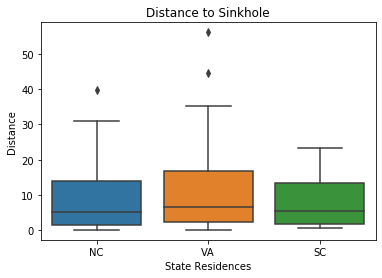

In [8]:
# Statistical Conclusion of the Distance to Sinkhole
sns.boxplot(x='OwnerState', y='DistancetoSinkhole', data=sinkhole_df)
plt.xlabel('State Residences')
plt.ylabel("Distance")
plt.title('Distance to Sinkhole')

plt.savefig("Images/SinkholeComparison.png")
plt.show()

In [9]:
# Defining the new DataFrame based on Owner State and Location Windspeed
windspeed_df = nat_disasters_df[
            ['OwnerState','LocationWindSpeed']
]
windspeed_df.describe()

,LocationWindSpeed
count,227.000000
mean,129.312775
std,10.313835
min,100.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,150.000000


In [10]:
# Filtering the data based on State
nc_windspeed_df = windspeed_df.loc[windspeed_df["OwnerState"] == "NC", :]
nc_windspeed_df.head()

sc_windspeed_df = windspeed_df.loc[windspeed_df["OwnerState"] == "SC", :]
sc_windspeed_df.head()

va_windspeed_df = windspeed_df.loc[windspeed_df["OwnerState"] == "VA", :]
va_windspeed_df.head()

,OwnerState,LocationWindSpeed
1,VA,140.0
2,VA,130.0
3,VA,123.0
5,VA,123.0
6,VA,123.0


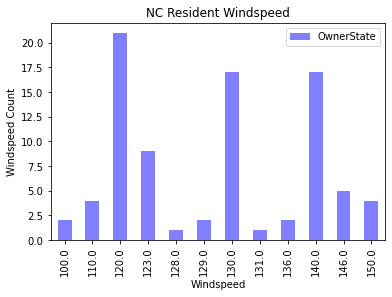

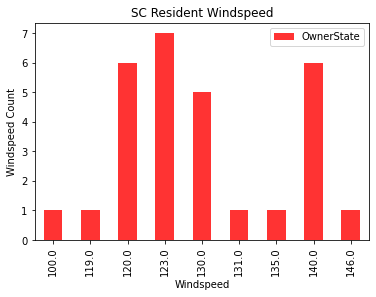

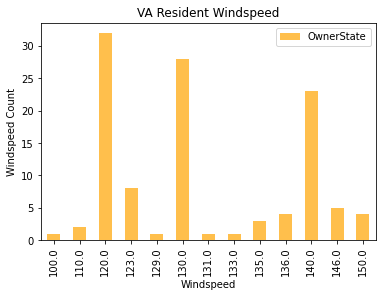

In [11]:
# Plotting the Count of Windspeed
nc_windspeed_count = nc_windspeed_df.groupby(['LocationWindSpeed']).count()

plot_windspeed_count = nc_windspeed_count.plot.bar(color='blue', alpha=0.5, align="center")
plt.xlabel('Windspeed')
plt.ylabel('Windspeed Count')
plt.title('NC Resident Windspeed')

plt.savefig("Images/NC Resident Windspeed.png")
plt.show()

sc_windspeed_count = sc_windspeed_df.groupby(['LocationWindSpeed']).count()

sc_plot_windspeed_count = sc_windspeed_count.plot.bar(color='red', alpha=0.8, align="center")
plt.xlabel('Windspeed')
plt.ylabel('Windspeed Count')
plt.title('SC Resident Windspeed')

plt.savefig("Images/SC Resident Windspeed.png")
plt.show()


va_windspeed_count = va_windspeed_df.groupby(['LocationWindSpeed']).count()

va_plot_windspeed_count = va_windspeed_count.plot.bar(color='orange', alpha=0.7, align="center")
plt.xlabel('Windspeed')
plt.ylabel('Windspeed Count')
plt.title('VA Resident Windspeed')

plt.savefig("Images/VA Resident Windspeed.png")
plt.show()

In [12]:
# Defining the new DataFrame based on Owner State and Windborne Debris Region
windborne_debris_df = nat_disasters_df[
            ['OwnerState', 'WindborneDebrisRegion']
]
windborne_debris_df.head()

,OwnerState,WindborneDebrisRegion
0,NC,True
1,VA,True
2,VA,True
3,VA,True
4,SC,True


In [13]:
# Filtering the data based on State
nc_windborne_debris_df = windborne_debris_df.loc[(windborne_debris_df["OwnerState"] == "NC"), :]
nc_windborne_debris_df.head()

sc_windborne_debris_df = windborne_debris_df.loc[(windborne_debris_df["OwnerState"] == "SC"), :]
sc_windborne_debris_df.head()

va_windborne_debris_df = windborne_debris_df.loc[(windborne_debris_df["OwnerState"] == "VA"), :]
va_windborne_debris_df.head()

,OwnerState,WindborneDebrisRegion
1,VA,True
2,VA,True
3,VA,True
5,VA,True
6,VA,True


In [14]:
# Finding the count of the Windborne Debris Region
nc_windborne_count = nc_windborne_debris_df.value_counts('WindborneDebrisRegion')
nc_windborne_count

sc_windborne_count = sc_windborne_debris_df.value_counts('WindborneDebrisRegion')
sc_windborne_count

va_windborne_count = va_windborne_debris_df.value_counts('WindborneDebrisRegion')
va_windborne_count

WindborneDebrisRegion
True     110
False      3
dtype: int64

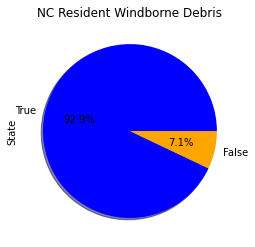

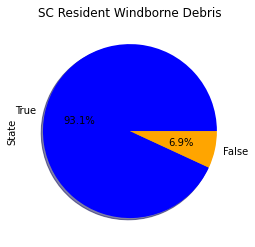

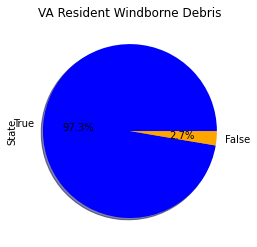

In [15]:
# Plotting the count of the Windborne Debris Region for each State
nc_colors = ['Blue', 'Orange']
nc_windborne_count.plot.pie(shadow=True, autopct = "%1.1f%%", colors = nc_colors)

plt.title('NC Resident Windborne Debris')
plt.ylabel('State')
plt.savefig("Images/nc_windborne.png")
plt.show()

sc_colors = ['Blue', 'Orange']
sc_windborne_count.plot.pie(shadow=True, autopct = "%1.1f%%", colors = sc_colors)

plt.title('SC Resident Windborne Debris')
plt.ylabel('State')
plt.savefig("Images/sc_windborne.png")
plt.show()

va_colors = ['Blue', 'Orange']
va_windborne_count.plot.pie(shadow=True, autopct = "%1.1f%%", colors = va_colors)
 
plt.title('VA Resident Windborne Debris')
plt.ylabel('State')
plt.savefig("Images/va_windborne.png")
plt.show()

In [16]:
# Defining the new DataFrame based on Owner State and Terrain
terrian_df = nat_disasters_df[['OwnerState','Terrain']]
terrian_df.head()

,OwnerState,Terrain
0,NC,B
1,VA,HVHZ
2,VA,C
3,VA,C
4,SC,C


In [17]:
# Filtering the data based on State
nc_terrain_df = terrian_df.loc[(terrian_df["OwnerState"] == "NC"), :]
nc_terrain_df.head()

sc_terrain_df = terrian_df.loc[(terrian_df["OwnerState"] == "SC"), :]
sc_terrain_df.head()

va_terrain_df = terrian_df.loc[(terrian_df["OwnerState"] == "VA"), :]
va_terrain_df.head()

,OwnerState,Terrain
1,VA,HVHZ
2,VA,C
3,VA,C
5,VA,C
6,VA,C


In [18]:
#Finding the count of Terrain for each state
nc_terrain_count = nc_terrain_df.value_counts('Terrain')
nc_terrain_count

sc_terrain_count = sc_terrain_df.value_counts('Terrain')
sc_terrain_count

va_terrain_count = va_terrain_df.value_counts('Terrain')
va_terrain_count

Terrain
B       56
C       43
HVHZ    14
dtype: int64

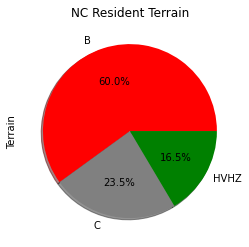

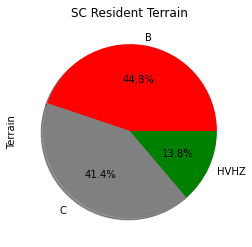

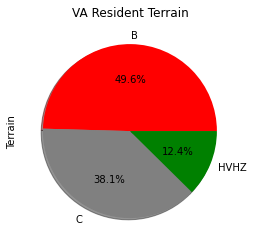

In [19]:
#Plotting the count of Terrain for each State
nc_colors = ['Red', 'Gray', "Green"]
nc_terrain_count.plot.pie(shadow=True, autopct = "%1.1f%%", colors = nc_colors)

plt.title('NC Resident Terrain')
plt.ylabel('Terrain')
plt.savefig("Images/nc_terrain.png")
plt.show()

sc_colors = ['Red', 'Gray', "Green"]
sc_terrain_count.plot.pie(shadow=True, autopct = "%1.1f%%", colors = sc_colors)

plt.title('SC Resident Terrain')
plt.ylabel('Terrain')
plt.savefig("Images/sc_terrain.png")
plt.show()
             
va_colors = ['Red', 'Gray', "Green"]
va_terrain_count.plot.pie(shadow=True, autopct = "%1.1f%%", colors = va_colors)

plt.title('VA Resident Terrain')
plt.ylabel('Terrain')
plt.savefig("Images/va_terrain.png")
plt.show()

In [20]:
#Defining the Dataframe
terrian2_df = nat_disasters_df[['ValueofHome','Terrain']]
terrian2_df.describe()

,ValueofHome
count,2.280000e+02
mean,2.491023e+05
std,1.920444e+05
min,2.970000e+04
25%,1.235985e+05
50%,1.953120e+05
75%,3.106392e+05
max,1.233088e+06


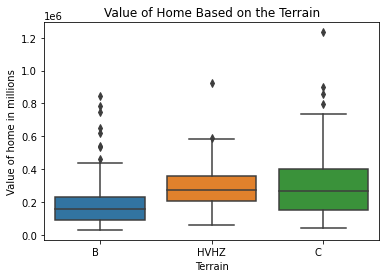

In [26]:
# Analysis between the Terrain and Value of Home
sns.boxplot(x='Terrain', y='ValueofHome', data=terrian2_df)
plt.xlabel('Terrain')
plt.ylabel("Value of home in millions")
plt.title('Value of Home Based on the Terrain')

plt.savefig('Images/Value of Home Based on the Terrain.png')
plt.show()

In [9]:
#Defining the Dataset
DistancetoSinkhole = nat_disasters_df[['ValueofHome','DistancetoSinkhole']]
DistancetoSinkhole.describe()

,ValueofHome,DistancetoSinkhole
count,2.280000e+02,227.000000
mean,2.491023e+05,9.506432
std,1.920444e+05,9.771763
min,2.970000e+04,0.110000
25%,1.235985e+05,1.840000
50%,1.953120e+05,5.920000
75%,3.106392e+05,14.635000
max,1.233088e+06,56.120000


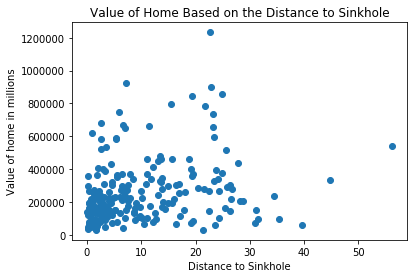

In [10]:
# Analysis to Visualize the Value of Home based on the Terrain
plt.scatter(x='DistancetoSinkhole', y='ValueofHome', data=DistancetoSinkhole)
plt.xlabel('Distance to Sinkhole')
plt.ylabel('Value of home in millions')
plt.title('Value of Home Based on the Distance to Sinkhole')

plt.savefig('Images/Distance to Sinkhole.png')
plt.show()